In [1]:
#Watershed Algorithm

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap = 'gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

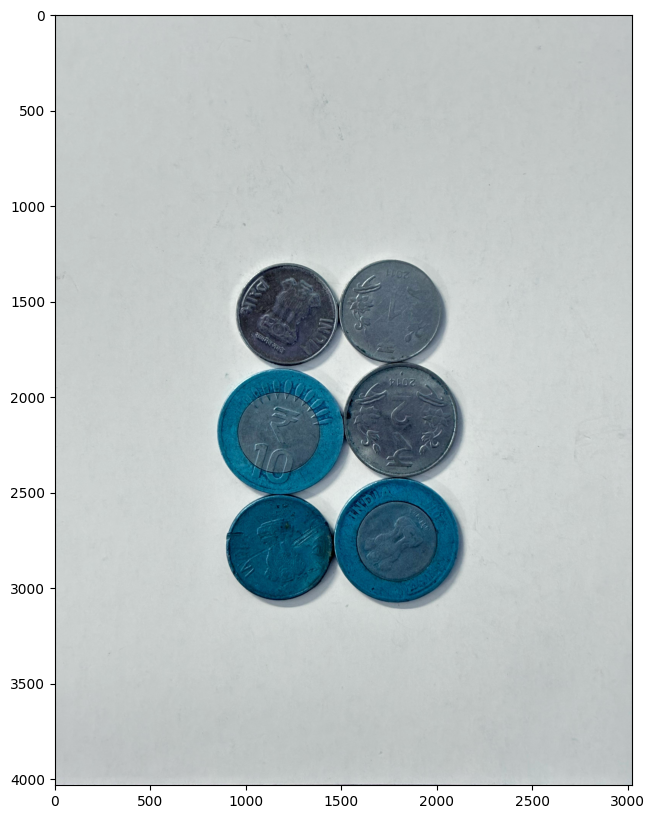

In [10]:
coins = cv2.imread("C:/Users/GUNGUN PANDEY/OneDrive/Desktop/rgb/sep_coin.jpg")
display(coins)

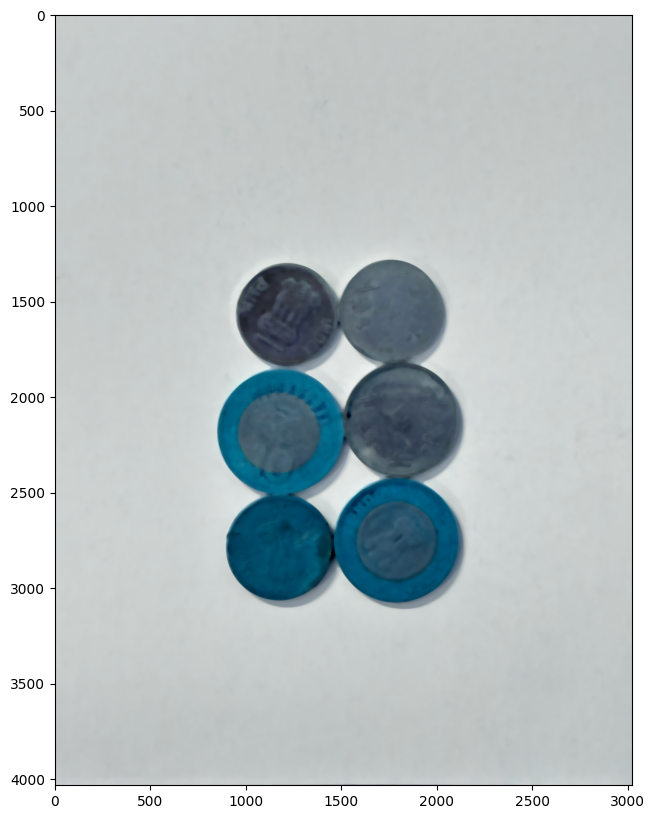

In [11]:
#Bluring the faces on the coins
sep_blur = cv2.medianBlur(coins,25)
display(sep_blur)

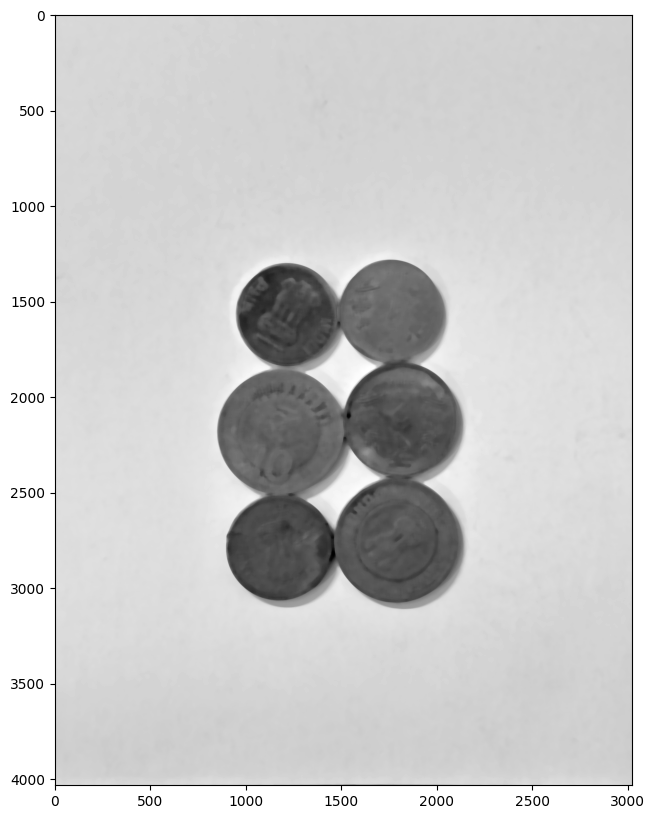

In [12]:
#Convert into Grayscale
gray_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)
display(gray_coins)

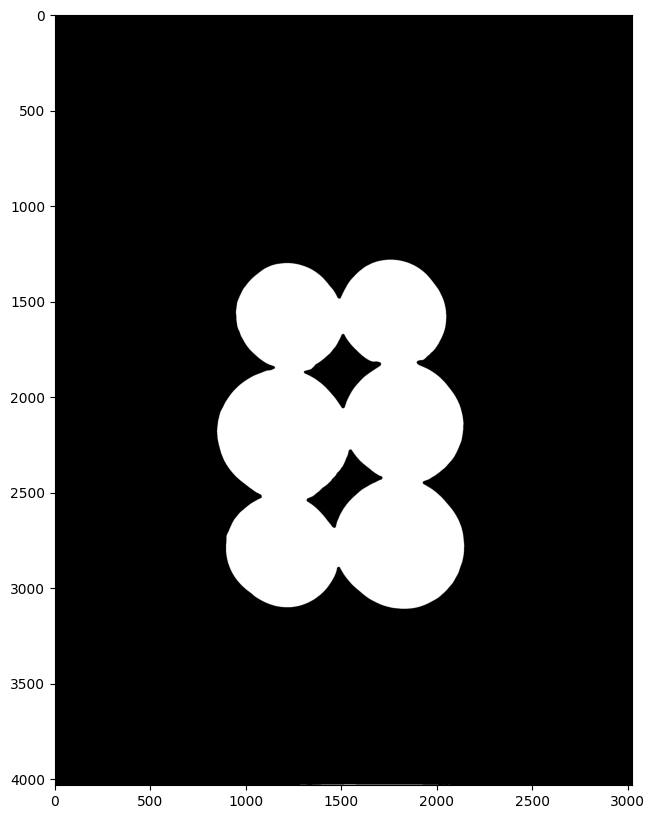

In [18]:
#Applyin a binary threshold
ret, sep_thresh = cv2.threshold(gray_coins, 160, 255, cv2.THRESH_BINARY_INV)
display(sep_thresh)

In [19]:
contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(coins, contours, i, (255,0,0),10)

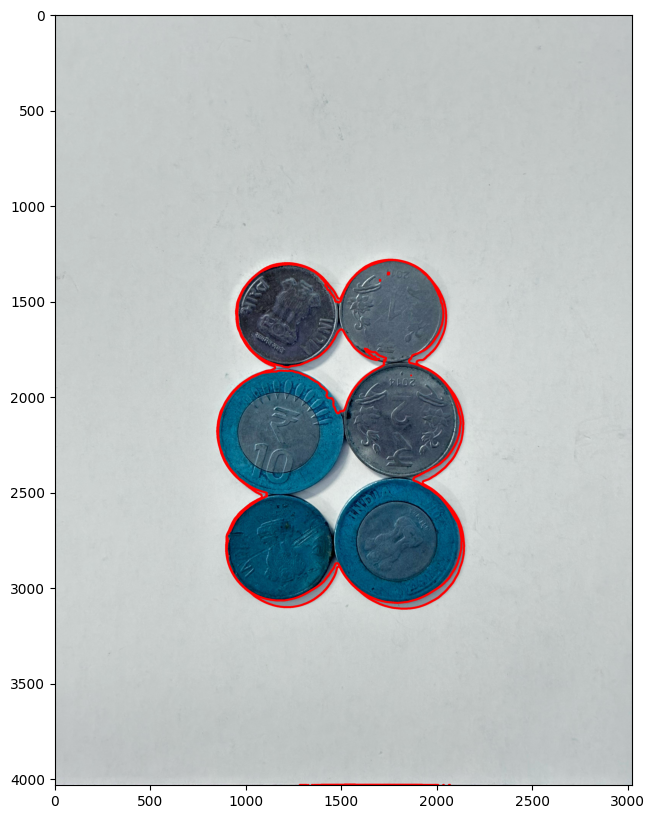

In [20]:
display(coins)

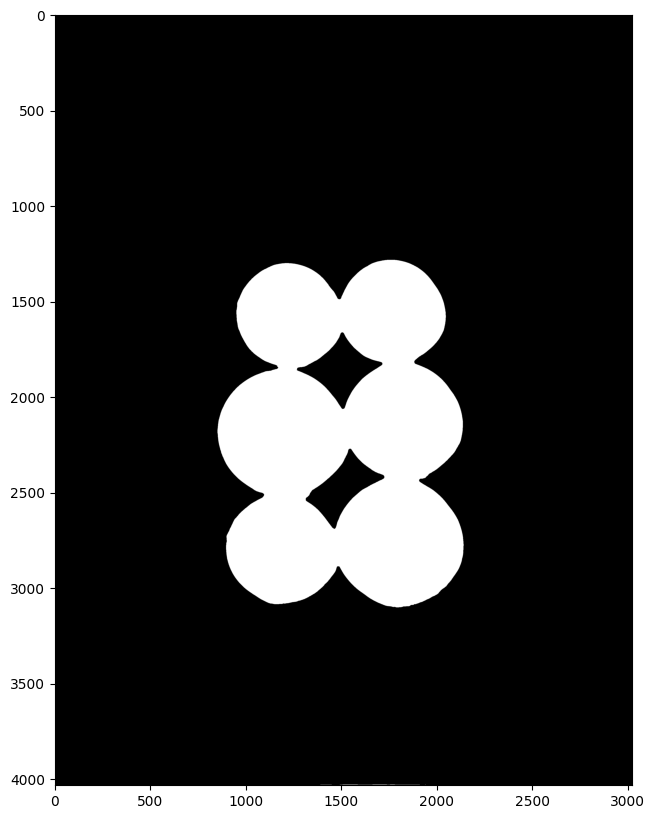

In [21]:
ret, thresh = cv2.threshold(gray_coins, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#Applying Otsu's method
display(thresh)

In [22]:
#Noise removal
kernel = np.ones((3,3), np.uint8)

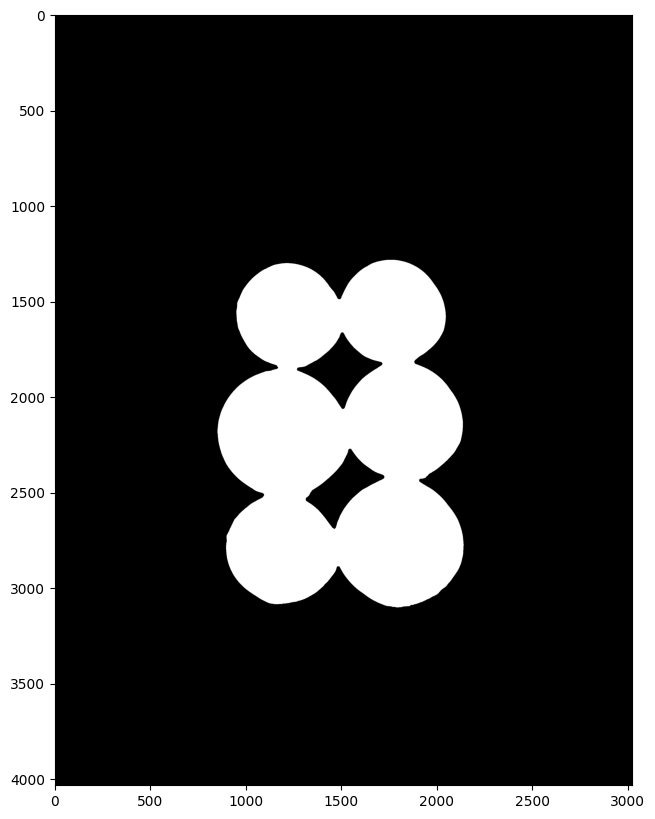

In [23]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
display(opening)

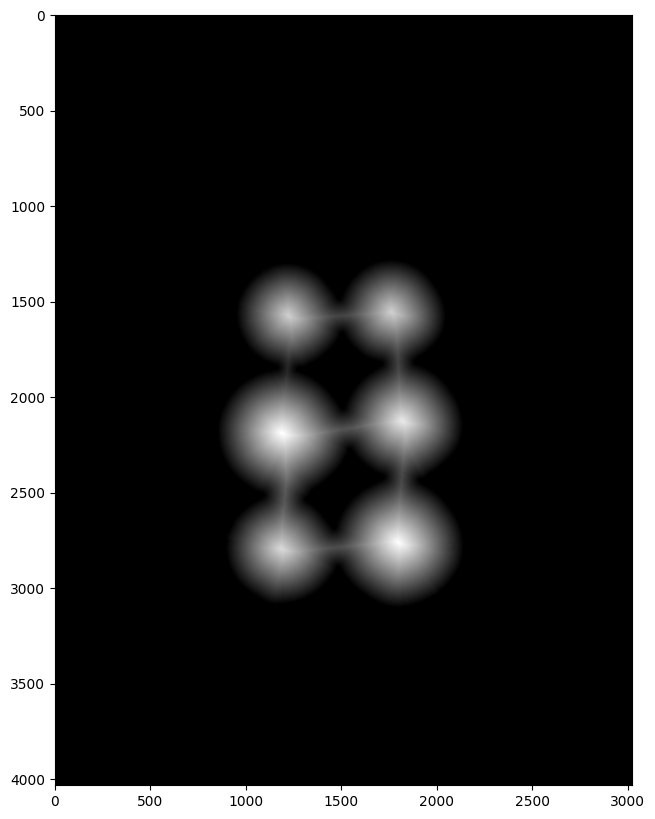

In [26]:
#Applying Distance tranform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
display(dist_transform)

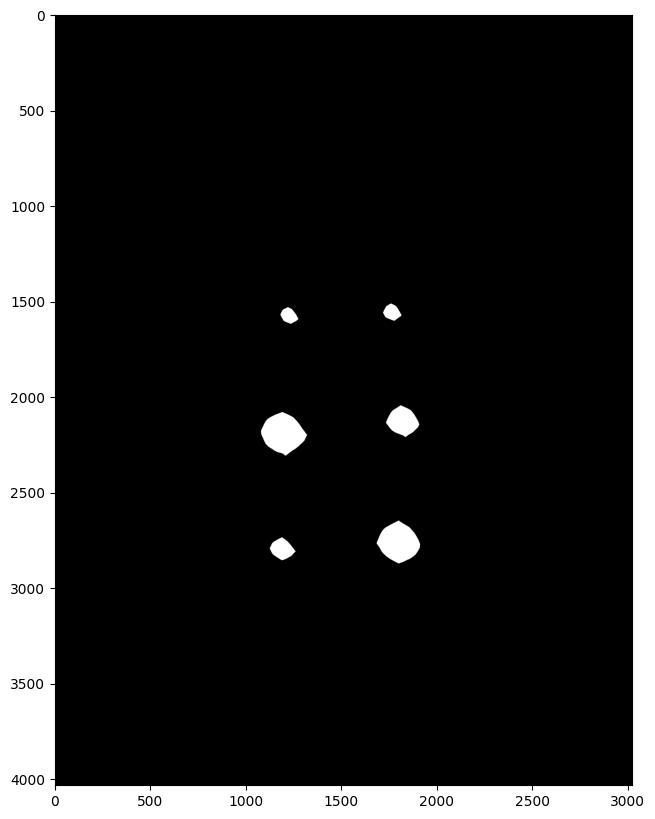

In [29]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
display(sure_fg)

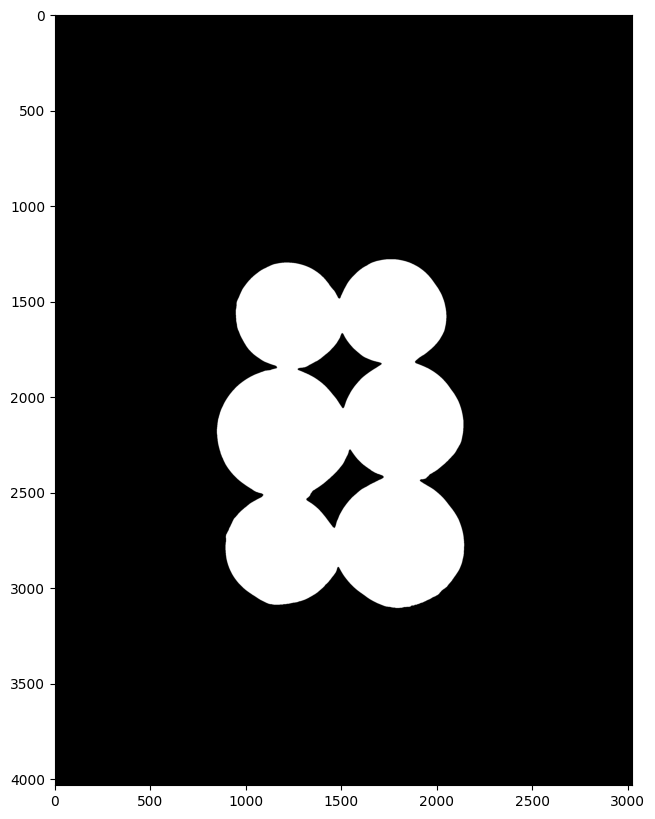

In [31]:
sure_bg = cv2.dilate(opening, kernel, iterations =3)
display(sure_bg)

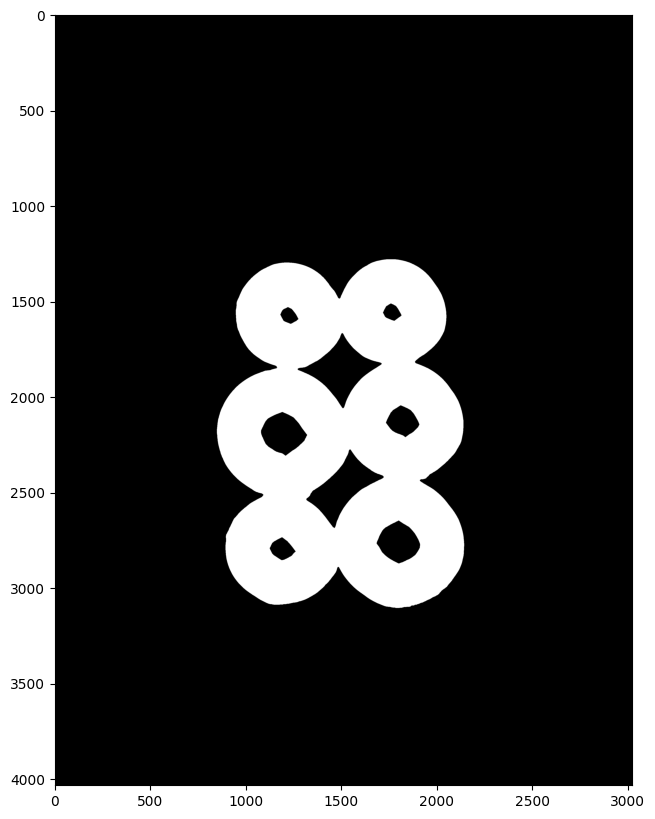

In [35]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
display(unknown)

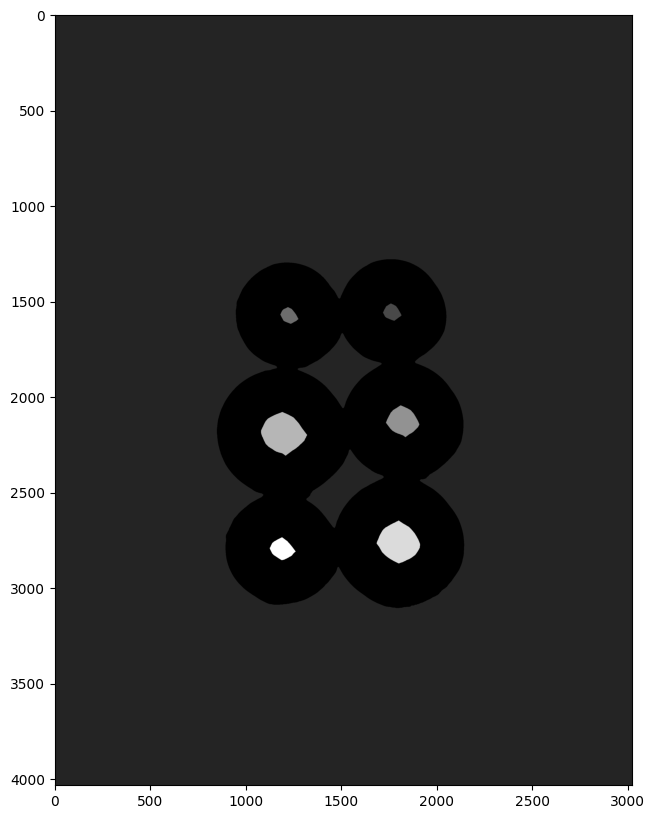

In [37]:
#Creating the label markers for the Watershed algo
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
display(markers)

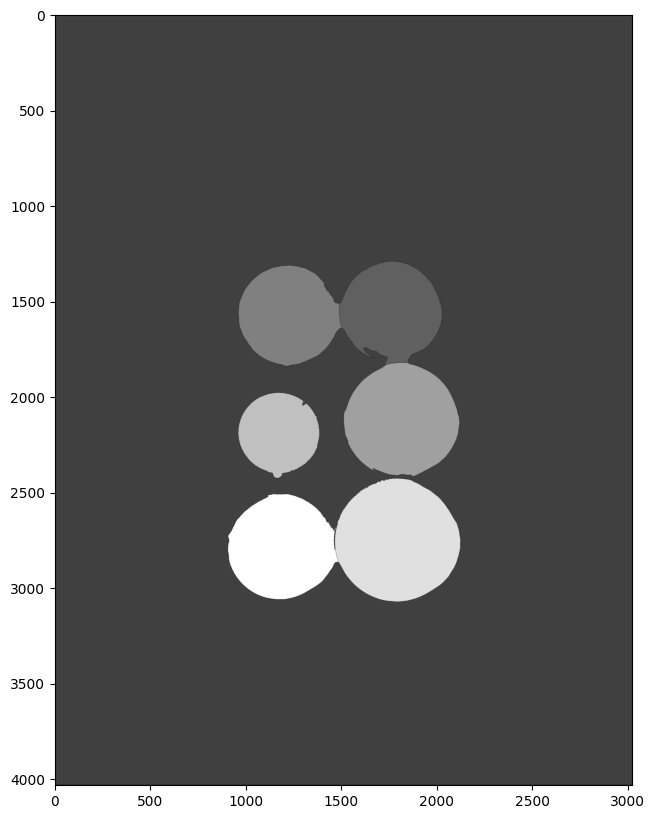

In [39]:
markers = cv2.watershed(coins, markers)
display(markers)

In [40]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(coins, contours, i, (255,0,0),10)

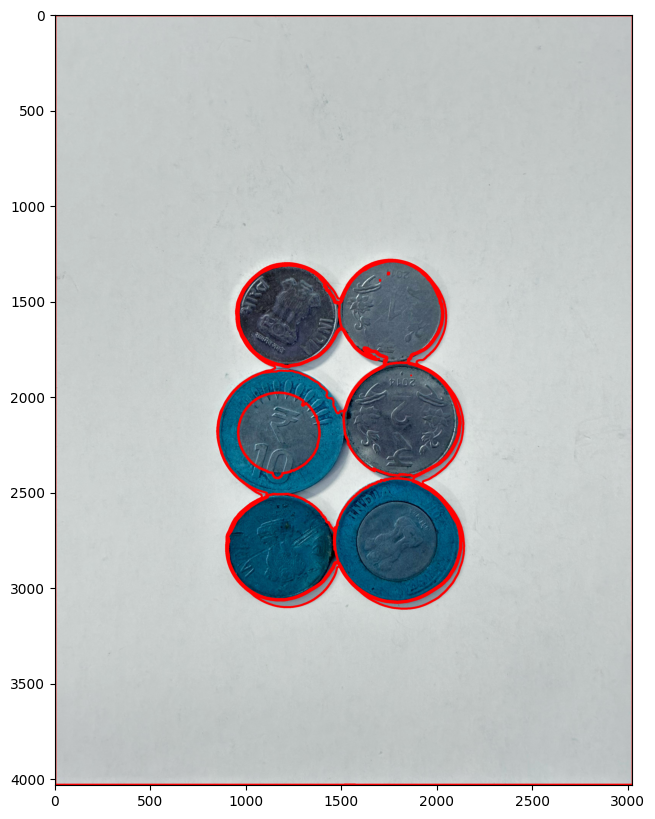

In [41]:
display(coins)